In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.chdir('/Users/danielfeeney/Documents/Data_vis')
dat = pd.read_csv('gun-violence-data.csv')

dat.columns
dat.head(5)
#Which state had the greatest incidence of violence?

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing          ...           \
0                        False          ...            
1                        False          ...            
2                        False          ...            
3                        False          ...            
4                        False          ...            

                     participant_age  \
0                              0::20   
1                              0::20   
2  0::25||1::31||2::33||3::34||4::33   
3         0::29||1::33||2::56||3::33   
4         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...    

In [6]:
#How many occured in each state?
dat['state'].value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [7]:
dat.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

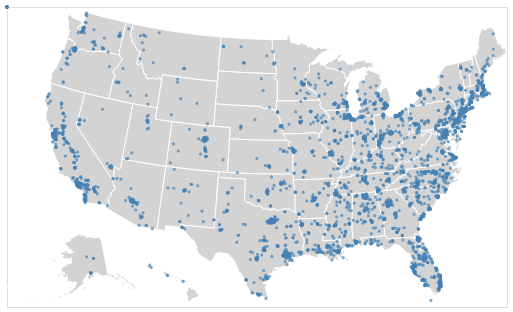

In [18]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')
dat2 = dat[0:4999]

states = alt.topo_feature(data.us_10m.url, feature='states')
airports = data.airports.url

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# airport positions on background
points = alt.Chart(dat2).mark_circle().encode(
    longitude='longitude',
    latitude='latitude',
    size=alt.value(10),
    color=alt.value('steelblue')
)

background + points


0         -79.8559
1        -118.3330
2         -82.1377
3        -104.8020
4         -79.9569
5         -95.9768
6        -106.7160
7         -90.0836
8        -121.7180
9         -76.6412
10        -85.2697
11        -90.2494
12        -91.5251
13        -76.9717
14        -83.8218
15        -89.8871
16       -121.5830
17        -87.5628
18        -90.0676
19       -122.2280
20        -75.5499
21       -111.9030
22       -117.9430
23        -95.8778
24        -85.6853
25       -118.1310
26        -83.6704
27        -93.7726
28        -83.7912
29        -83.9082
            ...   
239647         NaN
239648         NaN
239649         NaN
239650   -118.0450
239651    -98.5151
239652    -96.8059
239653   -119.7800
239654   -119.7760
239655   -117.1360
239656    -77.5617
239657   -119.2830
239658         NaN
239659    -81.4594
239660   -121.3140
239661         NaN
239662    -93.0609
239663    -97.4163
239664    -90.4990
239665         NaN
239666         NaN
239667    -89.9872
239668      